# Dynamic response of control systems

Today, we delve deeper into understanding the dynamic response of control systems.

Having introduced the transfer function of a plant, which refers to the modeling of the plant, and models of disturbances and test signals, we are poised to explore the dynamic response of the system. Let's visualize our model.

<table><tr>
<td> <img src="./pics/05_dynamic_systems_input-output-diagram-using-trasfer-function-model.png" alt="input-output-diagram-using-trasfer-function-model" style="width: 450px;"/>    
</tr></table> 

Remember, the general form for the system's output in the Laplace domain is $Y(s)=G(s)R(s)$. This relationship transforms convolution in the time domain to multiplication in the s-domain.

When interested in the time response $y(t)$, we'll have to obtain $G(s)$ and $R(s)$, calculate $Y(s)$, and finally invert to get $y(t)$.

Considering the inversion of Laplace, it's tabulated in various textbooks, so we won't delve deep into its derivations. Rather, we'll utilize these tables for inversion purposes.

Recall that $R(s)$ are modeled typically through impulse, step, ramp, and parabolas.

##  Common Laplace Transform pairs

<table><tr>
<td> <img src="./pics/05_dynamic_systems_table-1-complete-laplace-transform-table-cut.png" alt="table-1-complete-laplace-transform-table-cut" style="width: 450px;"/>    
</tr></table> 


**Pop-up Question:** Can you recall the significance of the transfer function in control systems?

Answer: The transfer function, $G(s)$, represents the relationship between the input and output of a system in the Laplace domain. It is a crucial tool for analysis and design in control systems.

For better clarity, let's dive into a few examples:

### Example 1

$$
G(s) = \frac{1}{s^2+3s+2}
$$

It's observed that the numerator polynomial is of zero order, and the denominator polynomial is of second order, implying a second-order system. To represent it in pole-zero form:

$$
G(s) = \frac{1}{(s+1)(s+2)}
$$

Given the input $ r(t) = 5 \mu(t) $, a step input of magnitude 5, we know that  $ R(s) = \frac{5}{s}  $. 

Therefore,  $ Y(s) = G(s) R(s)  $ becomes:  
$$  Y(s) = \frac{5}{s(s+1)(s+2))} $$

We now have three poles in the response transfer.


Let's derive the response $y(t)$ from $Y(s)$.

For systems like this, using partial fraction decomposition helps in breaking down complex expressions, which can then be inversely transformed to the time domain easily.

Let's delve on how to do this: `06_inverse_laplace_transform`

Applying fraction expansion we obtain:

$$  Y(s) = \frac{5}{s(s+1)(s+2))} = \frac{5/2}{s} - \frac{5}{s+1} + \frac{5/2}{(s+2)}$$

Note:
- $- \frac{5}{s+1} + \frac{5/2}{(s+2)}$ are due to the system poles
- $\frac{5/2}{s}$ is due to the excitation pole

Inverting $Y(s)$ we obtain:

$$
y(t) = \frac{5}{2} - 5e^{-t} + \frac{5}{2}e^{-2t}
$$

- The terms $- 5e^{-t} + \frac{5/2}e^{-2t}$ are generated when the system is excited by the step input. These two terms die away as time increases. This is the **transient response** of the system

- The term $\frac{5}{2}$ is due to the input, and its nature is similar to the input itself. However its amplitude has been modified, and this depends on the response of the system to the input.
Since the input persist for all time, this specific response will persist for all time. This is called the **steady state response**.

### The final value theorem

The final value theorem is an indispensable tool for determining the steady-state value of a system's response without having to compute the entire time-domain response.

$$
y_{ss} = \lim_{t \to \infty} y(t) = \lim_{s \to 0} s Y(s)
$$

It is essential to note that the Final Value Theorem is applicable if and only if the following conditions are met:

- The poles of $Y(s)$ are located in the left half of the s-plane, ensuring the function is stable.
$$\Downarrow$$
This means that $s Y(s)$ has no poles on $j\omega-axis$ and/or the right half plance.


**Pop-up Question**: Why do we focus on the left half of the s-plane for the application of the Final Value Theorem?

**Answer**: Systems with poles in the right half of the s-plane are unstable, and their responses tend to infinity as $t→∞$. The theorem requires the function to stabilize or reach a steady-state value as time approaches infinity.

In our case:

$$
s Y(s) = \frac{5s}{s(s+1)(s+2)}
$$

and hence:

$$
y_{ss} = \lim_{s \to 0} s Y(s) = \frac{5}{2}
$$


We can now plot the step response of the system, i.e., $y(t)$.

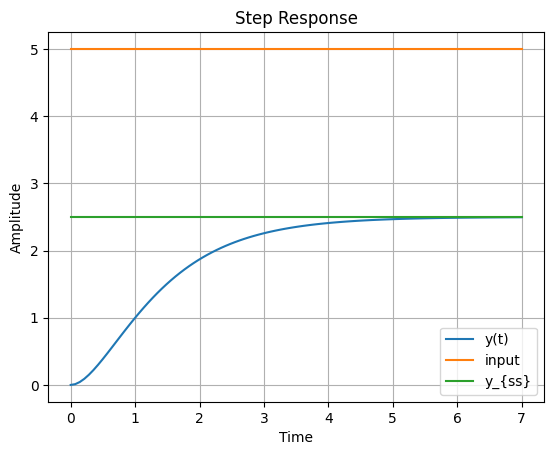

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

# Python code to obtain time response
sys = lti([5], [1, 3, 2])
t, y = step(sys)
plt.plot(t, y, label='y(t)')
plt.plot(t, np.linspace(5,5,num=len(t)), label='input')
plt.plot(t, np.linspace(5/2,5/2,num=len(t)), label='y_{ss}')
plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

### Example 2

We consider the same plant as before:

$$
G(s) = \frac{1}{(s+1)(s+2)} = \frac{1}{s^2+3s+2}
$$

but now with a ramp input:

$$
r(t) = 5t\mu(t)
$$

whose Laplace transform is 

$$
R(s) = \frac{5}{s^2}
$$

and the response tranform is:

$$
Y(s) = \frac{5}{s^2(s+1)(s+2)}
$$

We can calculate the inverse transform with partial fraction decomposition.

$$
Y(s) = \frac{5}{s^2(s+1)(s+2)} = \\
\frac{5/2}{s^2} + \frac{K}{s} + \frac{5}{s+1} - \frac{5/4}{s+2}
$$

where 

$$
K= \frac{d}{ds}\Big[\frac{5}{(s+1)(s+2)}\Big]\Big|_{s=0} = \frac{d}{ds}\Big[\frac{5}{(s^2+3s+2)}\Big]\Big|_{s=0} = - \frac{5(2s+3)}{(s^2+3s+2)^2)}\Big|_{s=0} = \frac{-15}{4}
$$

and hence the full expression is:

$$
Y(s) = \frac{5}{s^2(s+1)(s+2)} = \\
\frac{5/2}{s^2} - \frac{15/4}{s} + \frac{5}{s+1} - \frac{5/4}{s+2}
$$

We can invert:

$$
y(t) = \frac{5}{2}t - \frac{15}{4} + 5e^{-t} - \frac{5}{4}e^{-2t} 
$$

- Again the terms due to the system poles go to zeros (transient component) - last two terms in the equation.
- The other components (first two components) are due to the presence of the specific ramp input.

The steady state in this case hence is:

$$
y_{ss} = \frac{5}{2}t - \frac{15}{4} 
$$

The response is hence of the form:

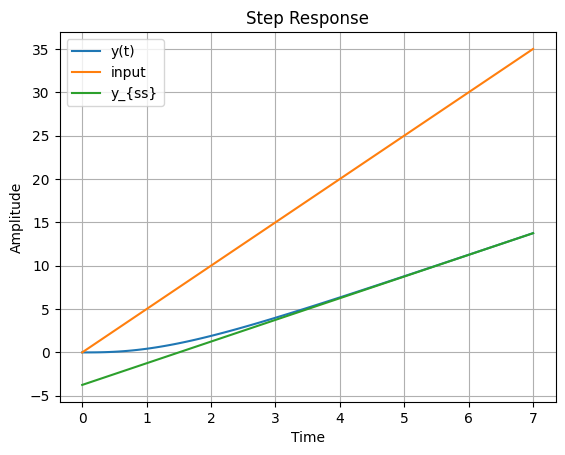

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

sys = lti([5], [1, 3, 2])
t, y = step(sys)

# Python code to obtain time response
y = 5/2*t-15/4 + 5*np.exp(-t) - 5/4*np.exp(-2*t)
plt.plot(t, y, label='y(t)')
plt.plot(t, 5*t, label='input')
plt.plot(t, 5/2*t-15/4, label='y_{ss}')
plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

Can we apply the final value theorem?


$$
y_{ss} = \lim_{t \to \infty} y(t) = \lim_{s \to 0} s Y(s) = \lim_{s \to 0} \frac{5s}{s^2(s+1)(s+2)} = \inf
$$

- However there is a pole at the origin and the final value theorem is not applicable.
- The steady state starts as soon as the transient dies out. 
- _The two values match at infinity, but the total steady state expression is not obtained by the final value theorem due to the presence of a pole at the origin in $sY(s)$._

# Characteristics of First-Order and Second-Order systems

Why focus specifically on first and second-order models out of the multitude of possible nth-order models? The answer lies in their omnipresence and significance. Most systems we will study can be appropriately described using these models, making them crucial in control systems design.

**Pop-up Question**: What do we mean by the "order" of a system?

**Answer**: The "order" of a system refers to the highest power of the derivative in its governing differential equation. It indicates the system's complexity and the number of initial conditions required for a complete solution.

## First-Order Systems 

Consider a simple mechanical system: an inertial load with a moment of inertia, 
$J$. 
This load is connected to a **rigid** shaft, implying the spring constant for this shaft is zero (it's non-flexible). 

<table><tr>
<td> <img src="./pics/05_dynamic_systems_inertial-load.png" alt="inertial-load" style="width: 450px;"/>    
</tr></table> 

The friction environment of the system can be schematically illustrated through two force bearings characterized by a viscous friction coefficient, $B$.

In this system:

- **Input Variable**: Torque, $T(t)$
- **Output Variable**: Speed, $ω(t)$
- **Constant Parameters**: $J$ and $B$

Based on Newton's laws, the governing equation becomes:

$$
J\dot\omega(t)+B\omega(t)=T(t)
$$

After applying the Laplace transformation:

$$
Js\omega(s)+B\omega(s)=T(s)
$$

Note: In our discussions, the systems will be considered "relaxed", meaning initial conditions are not appearing in the transformed equation.

From this, the transfer function $G(s)$ is derived:

$$
G(s)=\frac{\omega(s)}{T(s)} = \frac{1}{Js+B}
$$

which is a first-order model, with parameters $J$ and $B$.

## A General Model for First-Order Systems

Every first-order system, irrespective of its domain (mechanical, electrical, thermal, etc.), can be generalized using the following form:

$$
G(s) = \frac{K}{(\tau s+1)}
$$

With parameters:
- $K$: system gain.
- $\tau$: time constant of the system.

The term "system gain" refers to the steady-state change in output for a unit change in input. Meanwhile, the time constant describes how fast the system responds to changes.

For instance, if we apply a unit step input:

$$
T(s)=\frac{1}{s},
$$

the response becomes:

$$
\omega(s) = \frac{K}{s(\tau s+1)}
$$

The time domain response, $\omega(t)$, after inversion, characterizes the system's dynamic behavior: 

$$
\omega(t) = K \Big[ 1 - e^{-t/\tau}\Big]
$$

### Decoding the Parameters:

- **System Gain, $K$**: As $t→∞$, $\omega(t)$ approaches $K$, illustrating why $K$ is termed the system gain.
    - The speed of our system (the inertial load) changes to the value $K$ in response to a unit step. It changes the output of the system by $K$.
    
- **Time Constant, $\tau$**: The time constant signifies the system's speed of response. To understand this, let's sketch the system's response:

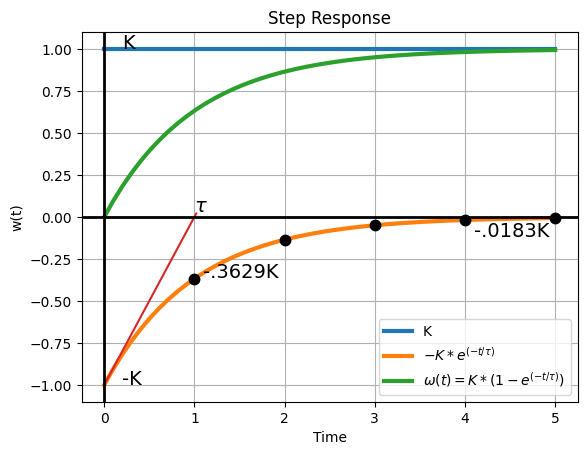

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

K = 1
tau = 1

t = np.linspace(0, 5, 50)
w_t = K*(1-np.exp(-t/tau))
transient = -K*np.exp(-t/tau)

# Create a new figure and axis
fig, ax = plt.subplots()

ax.plot(t, K*np.ones((len(t))), linewidth=3, label='K')
ax.plot(t, transient, label=r'$-K*e^{(-t/\tau)}$', linewidth=3)
ax.plot(t, w_t, label=r'$\omega(t)=K*(1-e^{(-t/\tau)})$', linewidth=3)
ax.plot(t[0:11], K/tau*t[0:11]-K)

for t_bar in [tau, 2*tau, 3*tau, 4*tau, 5*tau]:
    ax.plot(t_bar, -K*np.exp(-t_bar/tau), markersize=15, marker='.', color='k')

plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel("w(t)")
plt.grid(True)

# Plot the x=0 and y=0 axes
ax.axhline(0, color='black', linewidth=2)  # Horizontal line at y=0
ax.axvline(0, color='black', linewidth=2)  # Vertical line at x=0

ax.text(tau, 0.03, r'$\tau$', fontsize=14)
ax.text(0.2, K, 'K', fontsize=14)
ax.text(0.2, -K, '-K', fontsize=14)

ax.text(tau+0.1, -K*0.3629, '-.3629K', fontsize=14)
ax.text(4*tau+0.1, -K*0.0183-0.1, '-.0183K', fontsize=14)

plt.legend()
plt.show()

- The final value of the response is $K$.

- As for the transient term $-Ke^{-t/\tau}$, it diminishes to zero when $t$ approaches infinity.

Let's dive into the transient. 

By evaluating:

$$
\frac{d}{dt}\Big( -Ke^{-t/\tau} \Big) \Big|_{t=0} = \frac{K}{\tau}
$$

we infer that the initial rate of change of the transient at $t=0$ is $\frac{K}{\tau}$ (initial slope). 

If the transient maintained its initial rate of decrease, it would vanish in a duration of $\tau$.

This time constant gives us an idea about the duration it would take for the transient to wane if the decline was solely guided by its initial rate of change $\frac{K}{\tau}$.

Yet, this rate isn't static. Observing the specific values:

| $t$ | $e^{-t/\tau}$|
|-----|--------------|
| $\tau$  | 0.3679   |
| $4\tau$ | 0.0183   |
| $5\tau$ | 0.0067   |

We see that between $4\tau$ and $5\tau$, the transient is nearly non-existent, indicating the time it takes for the system to stabilize. Do remember, however, it truly becomes zero only as $t$ approaches infinity.

From a pragmatic standpoint, it's reasonable to assert that the system has reached its stable state in $5\tau$.

**Pop-up Question**: Why is the time constant crucial in control system design?

**Answer**: The time constant indicates the system's speed of response. For desired fast responses, a smaller time constant is preferable. Larger time constants might render the system's response sluggish, which is often undesirable in control applications.

#### Speed of response

In control system dynamics, the speed of response with which a system reacts is important. Upon an input's introduction, one of our goal is (typically) for the plant to respond without delay.

Considering the system's time constant — where it takes between $4\tau$ and $5\tau$ to achieve steady-state — a shorter time constant implies a quicker response. In contrast, a lengthier time constant suggests the system's tendency to respond more sluggishly.

#### Sluggish and fast Systems:

A system termed as 'sluggish' typically possesses a large time constant. Systems managing temperature control, liquid levels, pressure, or chemical compositions – these are the realms of process control applications and most of these applications usually have large time constants; in essence, they are 'sluggish'.

This stands in contrast to systems like speed control or radar tracking. These latter systems have smaller time constants, marking them 'fast' systems. 


Just to provide a scale, the time constant of systems can range anywhere from mere milliseconds (as seen in radar tracking or speed control systems) to a few minutes, commonly observed in temperature control setups among others. 

#### First order lag 

The transfer function we saw before

$$
G(s) = \frac{K}{(\tau s+1)}
$$

is known as the first-order lag. Essentially, when we see this term, it hints that the system does not allow for instantaneous response. 

- This system, either termed as the first-order lag or simply as a 'simple lag', is completely characterized by two parameters: $K$ (system gain) and $\tau$ (time constant).

# Second-Order Systems 

Moving forward from first-order systems, we also encounter second-order systems. A deeper dive is essential here, as most higher order systems (even those of the fourth, fifth, or tenth order) can often be well-approximated by second-order systems. This makes understanding second-order systems quintessential for our design considerations.

Imagine a load having a moment of inertia $J$. 
In this scenario, the shaft is made **flexible**, with torque $T$ as input. 
This shaft flexibility can be described by a spring constant, denoted as small $k$ (distinct from the system gain $K$). The friction in this system is represented schematically and let's assume $B$ stands for the viscous friction parameter. The twist or position of this shaft, denoted as $\theta$, is what we're interested in.

<table><tr>
<td> <img src="./pics/05_dynamic_response_inertial-load-flexible-shaft-clearer.png" alt="inertial-load-flexible-shaft" style="width: 450px;"/>    
</tr></table>


In this system:

- **Input Variable**: Torque, $T(t)$
- **Output Variable**: Displacement of the shaft, $\theta$
- **Constant Parameters**: $J$, $k$, and $B$

The governing equation becomes:

$$
J\ddot{\theta}(t)+B\dot{\theta(t)}(t) + k\theta(t)=T(t)
$$

This is a second-order differential equation, and its corresponding transfer function is:

$$
Js^2\theta(s)+Bs\theta(s)+k\theta(s)=T(s)
$$


From this, the transfer function $G(s)$ is derived:

$$
G(s)=\frac{\theta(s)}{T(s)} = \frac{1}{Js^2+Bs+k}
$$

which is a second-order model, with parameters $J$, $B$ and $k$.

## A General Model for Second-Order Systems

While the terms $J$, $B$, and $k$ are specific to our example, in the broader control system context, we often employ three general parameters to describe the behavior of a second-order system: 

- $\omega_n$: natural frequency, 
- $\zeta$: damping ratio, 
- $K$: system gain.

The general transfer function model becomes:

$$
G(s) = \frac{K}{\frac{1}{\omega_n^2}s^2 + \frac{2\zeta}{\omega_n} s + 1}
$$

where, in our example:

- $K = \frac{1}{k}$
- $\omega_n = \sqrt{\frac{k}{J}}$
- $\zeta = \frac{1}{2}\frac{B}{\sqrt{kJ}}$


We now delve into the intricacies of second-order systems by examining their response to a step input. A deep comprehension of this behavior helps in delineating the significant roles played by the parameters: $\omega_n$ (natural frequency), $\zeta$ (damping ratio), $K$ (system gain).


#### Parameter $K$

The parameter $K$ determines, as before, the gain of the system.  The **final value theorem** can be employed to validate that for a unit step input, the final value of the response value is governed by $K$.

$$
Y(s) = \frac{K}{s\Big(\frac{1}{\omega_n^2}s^2 + \frac{2\zeta}{\omega_n} s + 1 \Big)}
$$

$$
sY(s) = \frac{K}{\Big(\frac{1}{\omega_n^2}s^2 + \frac{2\zeta}{\omega_n} s + 1 \Big)}
$$

Assuming that the values of $\omega_n$ (natural frequency) and $\zeta$ (damping ratio) are such that the roots of the denominator are in the left half plane, we can apply the Final Value Theorem:

$$
lim_{s \rightarrow 0} sY(s) = K
$$

#### Parameters $\omega_n$ and $\zeta$

$$
\frac{\theta(s)}{T(s)} = \frac{K\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}
$$

Since $T(s)=\frac{1}{s}$ (step input):

$$
\theta(s) = \frac{K\omega_n^2}{s\Big(s^2 + 2\zeta\omega_n s + \omega_n^2\Big)}
$$

The time domain response, $\theta(t)$, after inversion, characterizes the system's dynamic behavior:

$$
\theta(t) = \mathcal{L}^{-1}\Big[\theta(s)\Big]
$$

Let's consider four cases:

- case 1: $\zeta=0$

- case 2: $0<\zeta<1$

- case 3 $\zeta=1$

- case 4 $\zeta>1$
  
  
Case 1, in our example, corresponds to $B=0$ (no damping). All the other cases correspond to $B\ne0$ (damping)

#### Case 1, $\zeta=0$

$$
\theta(t) = K(1-\cos(\omega_nt))
$$


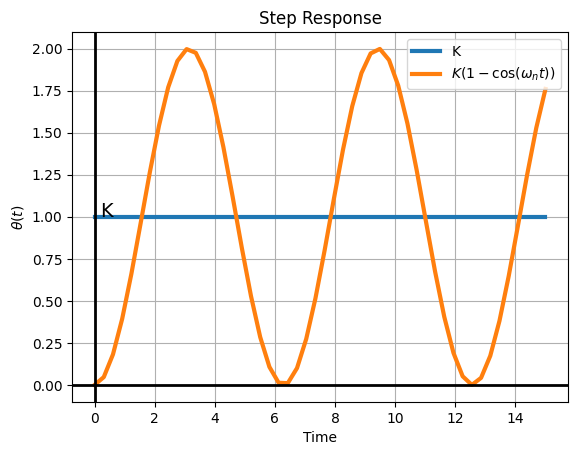

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

K = 1
omega_n = 1

t = np.linspace(0, 15, 50)
theta_t = K*(1-np.cos(omega_n*t))

# Create a new figure and axis
fig, ax = plt.subplots()

ax.plot(t, K*np.ones((len(t))), linewidth=3, label='K')
ax.plot(t, theta_t, label=r'$K(1-\cos(\omega_nt))$', linewidth=3)

plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel(r"$\theta(t)$")
plt.grid(True)

# Plot the x=0 and y=0 axes
ax.axhline(0, color='black', linewidth=2)  # Horizontal line at y=0
ax.axvline(0, color='black', linewidth=2)  # Vertical line at x=0

ax.text(0.2, K, 'K', fontsize=14)

plt.legend()
plt.show()

In this scenario, the system exhibits oscillations around the value of $K$.
These oscillations, owing to the absence of damping, are referred to as un-damped oscillations. 

- The frequency of these oscillations, $\omega_n$, is termed as the un-damped natural frequency.

**Note:** This is typically an unwanted behaviour (e.g., industrial setting), but depends on the requirements.

**Pop-up Question:** Why is the oscillating behavior not preferable in most control systems?
**Answer**: In most industrial scenarios, oscillations can lead to inefficiencies, system wear, or undesirable outcomes.
Example: Think about residential heating with an on/off control system. The temperature oscillates within a certain range, which might be acceptable for heating but not for precision-controlled processes.

#### Case 2, $0<\zeta<1$, Underdamped Case

The response, in this case, showcases damped oscillations.
In our example, this corresponds to $B\ne0$.

This case corresponds, in our example, to the case where:

$$
\frac{k}{J} > \Big(\frac{B}{2J}\Big)^2
$$

with response:

$$
\theta(t) = K\Big[1 - \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}} \sin\Big(\omega_d t + \tan^{-1} \frac{\sqrt{1-\zeta^2}}{\zeta}\Big)\Big]
$$

where:
- $\omega_d = \omega_n\sqrt{1-\zeta^2}$, is called damped natural frequency.

#### Response curves

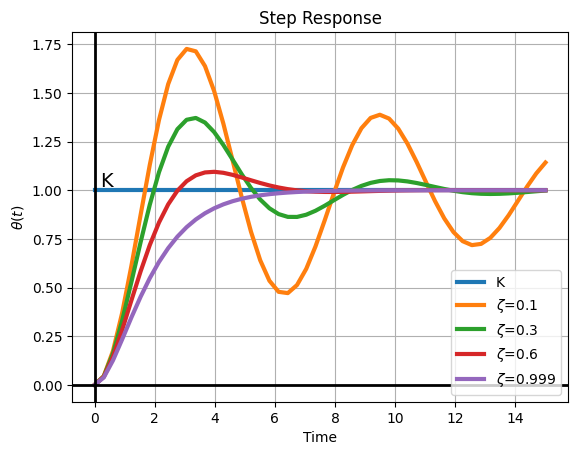

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

K = 1
omega_n = 1
zetas = [0.1, 0.3, 0.6, 0.999]

t = np.linspace(0, 15, 50)

# Create a new figure and axis
fig, ax = plt.subplots()
ax.plot(t, K*np.ones((len(t))), linewidth=3, label='K')

for zeta in zetas:
    omega_d = omega_n*np.sqrt(1-zeta**2)
    theta_t = K*(1 - np.exp(-zeta*omega_n*t)/np.sqrt(1-zeta**2)*np.sin(omega_d*t + np.arctan(np.sqrt(1-zeta**2)/zeta)))
    #theta_t = K*(1 - (1/np.sqrt(1-zeta**2)) * np.exp(-zeta*omega_n*t) * np.sin(omega_d*t+np.arccos(zeta)))
    ax.plot(t, theta_t, label=r'$\zeta$='+f"{zeta}", linewidth=3)

    
plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel(r"$\theta(t)$")
plt.grid(True)

# Plot the x=0 and y=0 axes
ax.axhline(0, color='black', linewidth=2)  # Horizontal line at y=0
ax.axvline(0, color='black', linewidth=2)  # Vertical line at x=0

ax.text(0.2, K+0.02, 'K', fontsize=14)

plt.legend()
plt.show()

In this regime, the system's response is oscillatory. However, these oscillations are not unbounded. Instead, they die out over time, which is often described as "damped oscillations", and decrease when $\zeta$ increases.

When $\zeta=1$ is the limiting situation where the oscillations have just died out.
The other limiting case is of course the one where $\zeta=0$, which we have just seen, and for which the oscillations are undamped.

**Note** from the graph above how the system becomes sluggish as the value of $\zeta$ increases: the settling time, the speed of response, increases.
If the $\zeta$ decreases however you are increases the oscillations.

### Practical Implications:
1. **System Behaviour**: In industrial control systems, the under-damped behavior is usually desired because it achieves a quick response without prolonged oscillations. Oscillations are typically seen as undesirable in control systems as they indicate instability or inefficiencies.

2. **Balancing Speed and Oscillation:** There's a delicate balance to strike. If 
$\zeta$ is too small (close to 0), the system can be too oscillatory, leading to potential instability. On the other hand, if $\zeta$ is too large (approaching 1), the system can become sluggish.

3. **Application Examples:**
For applications that can tolerate some oscillation in exchange for a rapid response (e.g., certain manufacturing processes), a slightly under-damped system might be ideal.
In scenarios where the precision of settling is vital (e.g., robotic arm positioning), it's crucial to design the system so that oscillations are minimal, even at the cost of a slower response. 

The choice of damping level in system design often involves trade-offs. While the under-damped case is often preferred, understanding the exact needs of a particular application or process is crucial. This ensures that the system responds optimally, balancing speed, oscillation, and stability.

Let's take a more detailed view now of the oscillations, looking at a typical under-damped response:

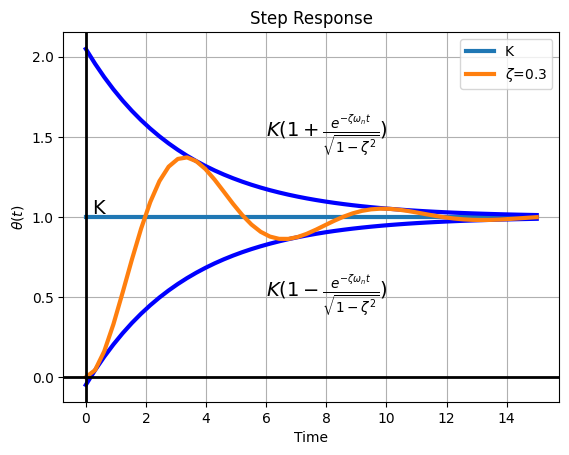

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

K = 1
omega_n = 1
zeta = 0.3

t = np.linspace(0, 15, 50)

fig, ax = plt.subplots()
ax.plot(t, K*np.ones((len(t))), linewidth=3, label='K')


omega_d = omega_n*np.sqrt(1-zeta**2)
theta_t = K*(1 - np.exp(-zeta*omega_n*t)/np.sqrt(1-zeta**2)*np.sin(omega_d*t + np.arctan(np.sqrt(1-zeta**2)/zeta)))

envelope_plus = K*(1 + np.exp(-zeta*omega_n*t)/np.sqrt(1-zeta**2))
envelope_minus = K*(1 - np.exp(-zeta*omega_n*t)/np.sqrt(1-zeta**2))

ax.plot(t, envelope_plus, linewidth=3, color='b')
ax.plot(t, envelope_minus, linewidth=3, color='b')    

ax.plot(t, theta_t, label=r'$\zeta$='+f"{zeta}", linewidth=3)

    
plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel(r"$\theta(t)$")
plt.grid(True)

# Plot the x=0 and y=0 axes
ax.axhline(0, color='black', linewidth=2)  # Horizontal line at y=0
ax.axvline(0, color='black', linewidth=2)  # Vertical line at x=0

ax.text(0.2, K+0.02, 'K', fontsize=14)
ax.text(6, 1.5, r'$K (1+\frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}})$', fontsize=14)

ax.text(6, 0.5, r'$K (1-\frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}})$', fontsize=14)

plt.legend()
plt.show()

The blue lines represent the envelope of the response:

$$
K (1 \pm \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}})
$$

The decay of the oscillations is determined by the envelope of the oscillatory response. The decay of the envelope depends on the exponential factor:

$$
e^{-\zeta\omega_nt}
$$

The time constant of this is:

$$
e^{-t/\tau} = e^{-\zeta\omega_nt}
$$

or 

$$
\tau = \frac{1}{\zeta\omega_n}
$$

The higher the value of $\zeta\omega_n$, the quicker the oscillations die out.


The system oscillates at a damped natural frequency, $\omega_d$, which is expressed as:

  $$\omega_d = \omega_n\sqrt{1-\zeta^2}$$
  
and where $\omega_n$ is the undamped natural frequency.

#### Case 3, $\zeta=1$, Critically Damped

Here, the system is on the brink of oscillating. The response showcases a scenario where oscillations are just eliminated.

In our example this corresponds to:

$$
\frac{k}{J} = \Big(\frac{B}{2J}\Big)^2
$$

with response:

$$
\theta(t) = K\Big[1 - e^{-\omega_n t} - \omega_n t e^{-\omega_n t} \Big]
$$

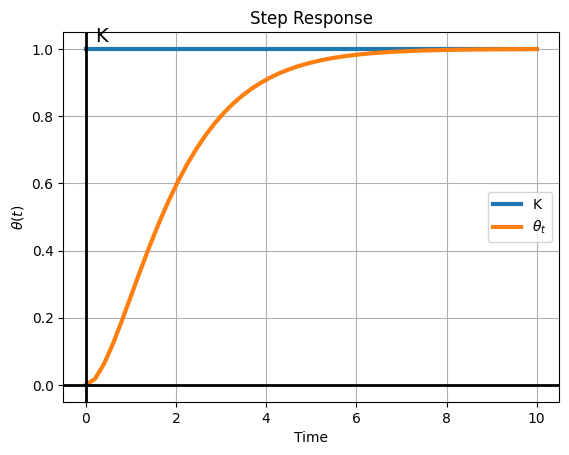

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

K = 1
omega_n = 1
zeta = 1

t = np.linspace(0, 10, 50)

fig, ax = plt.subplots()
ax.plot(t, K*np.ones((len(t))), linewidth=3, label='K')


theta_t = K*(1 - np.exp(-zeta*omega_n*t)  -omega_n*t*np.exp(-zeta*omega_n*t))


ax.plot(t, theta_t, label=r'$\theta_t$', linewidth=3)

    
plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel(r"$\theta(t)$")
plt.grid(True)

# Plot the x=0 and y=0 axes
ax.axhline(0, color='black', linewidth=2)  # Horizontal line at y=0
ax.axvline(0, color='black', linewidth=2)  # Vertical line at x=0

ax.text(0.2, K+0.02, 'K', fontsize=14)

plt.legend()
plt.show()

- Achieving critical damping is challenging, as it requires precise tuning. Even slight deviations can lead the system to become over or under-damped. 

- Critically damped systems return to equilibrium or the steady-state value without overshooting (oscillating) and in the quickest possible time.

- While under-damped systems oscillate around the equilibrium before settling, critically damped systems do not. They approach the equilibrium directly, with the quickest response time that avoids oscillation.

- For a second-order linear homogeneous differential equation describing a system, the critically damped state produces two equal real roots. This results in a solution that's a combination of exponential decay terms.


**Application Examples:**
- Vehicle Suspension: In cars, the shock absorbers aim to be critically damped to provide a comfortable ride by quickly absorbing bumps without causing the car to oscillate.
- Electronics: In circuit design, critically damped responses are preferred for signal processing where the signal needs to settle quickly without overshooting.

#### Case 4, $\zeta>1$, Over-Damped

- The Over-damped Case represents a situation where the damping is excessive, leading to a slow return to equilibrium. 

- Over-damped systems return to equilibrium slower than both critically damped and under-damped systems, with no overshooting.

- For the second-order linear homogeneous differential equation describing such a system, the over-damped state produces two distinct real roots. This results in a response combining two distinct exponential decay terms.

- There are cases where over-damping is intentional. In some sensitive equipment or processes, oscillation (even if it's minor) can be harmful or undesirable, making a slower return to equilibrium an acceptable trade-off. The over-damped case underscores the need for careful consideration in control and system design. While it might appear suboptimal due to its slow response, in certain contexts, this deliberate delay is crucial for maintaining safety and functionality


**Application Examples:**
- Door Closers: Many commercial door closers are over-damped to ensure that doors close completely without slamming or bouncing back.
- Safety Systems: Certain safety mechanisms might employ over-damping to guarantee a gentle, albeit slower, return to a safe state.